# Assignment-1
Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. Perform following tasks: 
1. Pre-process the dataset. 
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.
   
Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [247]:
df = pd.read_csv("./datasets/uber.csv", nrows=5000)
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [248]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [249]:
df = df.drop(['Unnamed: 0','key'], axis=1)
df.dropna(axis=0, inplace=True)
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        5000 non-null   float64
 1   pickup_datetime    5000 non-null   object 
 2   pickup_longitude   5000 non-null   float64
 3   pickup_latitude    5000 non-null   float64
 4   dropoff_longitude  5000 non-null   float64
 5   dropoff_latitude   5000 non-null   float64
 6   passenger_count    5000 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 273.6+ KB


In [251]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [252]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,11.343850,-72.746112,39.990314,-72.683736,39.998671,1.668800
std,10.744809,13.928678,6.098727,9.875941,6.072471,1.291139
min,2.500000,-748.016667,-73.997740,-75.350437,-73.992137,0.000000
25%,6.000000,-73.992073,40.735023,-73.991370,40.733358,1.000000
50%,8.500000,-73.981540,40.752465,-73.979872,40.752692,1.000000
75%,12.500000,-73.967498,40.766496,-73.963137,40.768382,2.000000
max,350.000000,40.770667,41.366138,40.761672,41.366138,6.000000


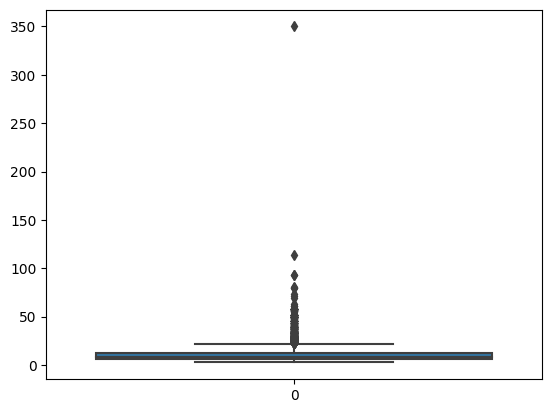

In [253]:
sns.boxplot(df["fare_amount"])
plt.show()

In [254]:
Q1 = df["fare_amount"].quantile(0.25)
Q3  = df["fare_amount"].quantile(0.75)
IQR = Q3 - Q1

lower_limit = (Q1 - 1.5 * IQR)
upper_limit = (Q1 + 1.5 * IQR)
df2 = df[(df["fare_amount"] > lower_limit) & (df["fare_amount"] < upper_limit)]

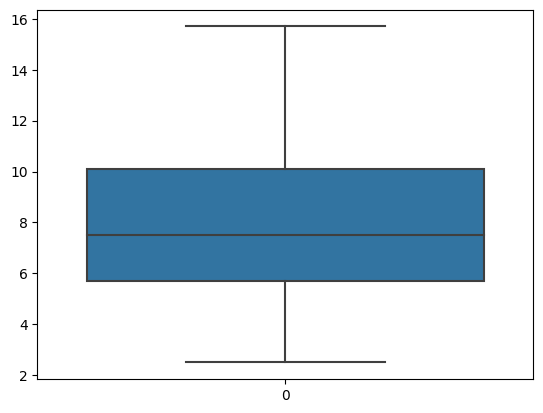

In [255]:
sns.boxplot(df2["fare_amount"])
plt.show()

In [256]:
def distance(lon1, lon2, lat1, lat2):
    lon1, lon2, lat1, lat2 = map(np.radians, [lon1, lon2, lat1, lat2])    
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    R = 6371
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c  
    return distance

In [257]:
df["distance"] = distance(df["pickup_longitude"], df["dropoff_longitude"], df["pickup_latitude"], df["dropoff_latitude"])

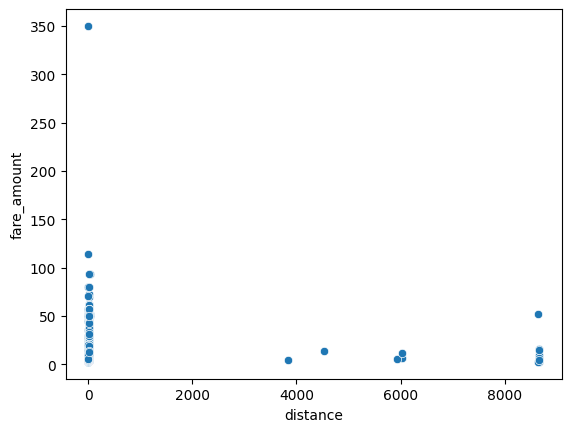

In [258]:
sns.scatterplot(x=df["distance"], y=df["fare_amount"])
plt.show()

In [259]:
df.drop(df[df['distance'] > 60].index, inplace = True)
df.drop(df[df['distance'] == 0].index, inplace = True)
df.drop(df[df['fare_amount'] == 0].index, inplace = True)
df.drop(df[df['fare_amount'] < 0].index, inplace = True)
df.drop(df[(df['fare_amount'] > 10) & (df['distance'] < 1)].index, inplace = True )
df.drop(df[(df['fare_amount'] < 10) & (df['distance'] > 10)].index, inplace = True )

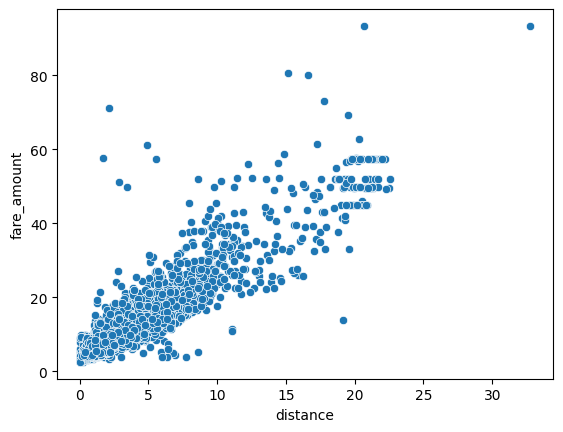

In [260]:
sns.scatterplot(x=df["distance"], y=df["fare_amount"])
plt.show()

In [261]:
x = df.drop("fare_amount", axis = 1)
x["pickup_datetime"] = pd.to_numeric(x["pickup_datetime"])

y = df["fare_amount"]

In [262]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

In [263]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_predicted = lr_model.predict(x_test)
lr_rmse = np.sqrt(mean_squared_error(lr_predicted, y_test))
print("RMSE value for Linear regression is", lr_rmse)

RMSE value for Linear regression is 9.707797756629224


In [264]:
rfr_model = RandomForestRegressor(n_estimators = 100, random_state = 1)
rfr_model.fit(x_train, y_train)
rfr_prediction = rfr_model.predict(x_test)
rfr_rmse = np.sqrt(mean_squared_error(rfr_prediction, y_test))
print("RMSE value for Random Forest is", rfr_rmse)

RMSE value for Random Forest is 3.5425660229506573
